In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.svm import LinearSVC
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import configparser as cp
import cv2
import numpy as np
from pickle import dump
from pickle import load
import glob
import time

%matplotlib inline


## Review Train Data

In [2]:
# Function to get training images
def get_train_data():
    images = glob.glob('data/*/*/*.png', recursive=True)
    cars = []
    notcars = []
    for image in images:
        if 'non-vehicles' in image:
            notcars.append(image)
        else:
            cars.append(image)

    return cars, notcars

cars, notcars = get_train_data()

In [11]:
num_of_samples = 8  # How many samples to display
cols = 4  # How many columns in display
num_rows = num_of_samples / cols

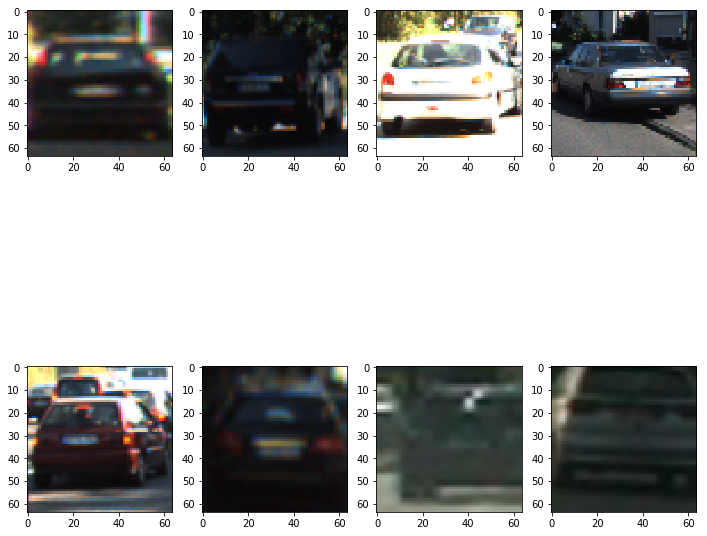

In [21]:
plt.figure(figsize=(12, 12))
for i in range(0, num_of_samples):   
    sample_id = np.random.randint(0, len(cars))  # Pick a random image
    plt.subplot(num_rows, cols, i+1)    
    image = mpimg.imread(cars[sample_id])
    plt.imshow(image)

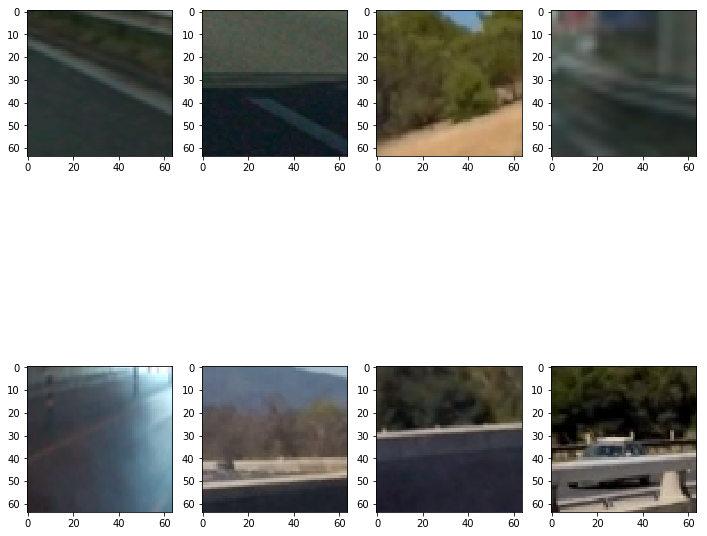

In [22]:
plt.figure(figsize=(12, 12))
for i in range(0, num_of_samples):   
    sample_id = np.random.randint(0, len(cars))  # Pick a random image
    plt.subplot(num_rows, cols, i+1)    
    image = mpimg.imread(notcars[sample_id])
    plt.imshow(image)

## Show Hog Features

In [5]:
# Parameters for feature extraction
color_space = 'YCrCb'
orient = 9
pix_per_cell = 16
hog_channel = 'ALL'
cell_per_block = 2 # HOG cells per block
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [480, None] # Min and max in y to search in slide_window()

cars, notcars = get_train_data()

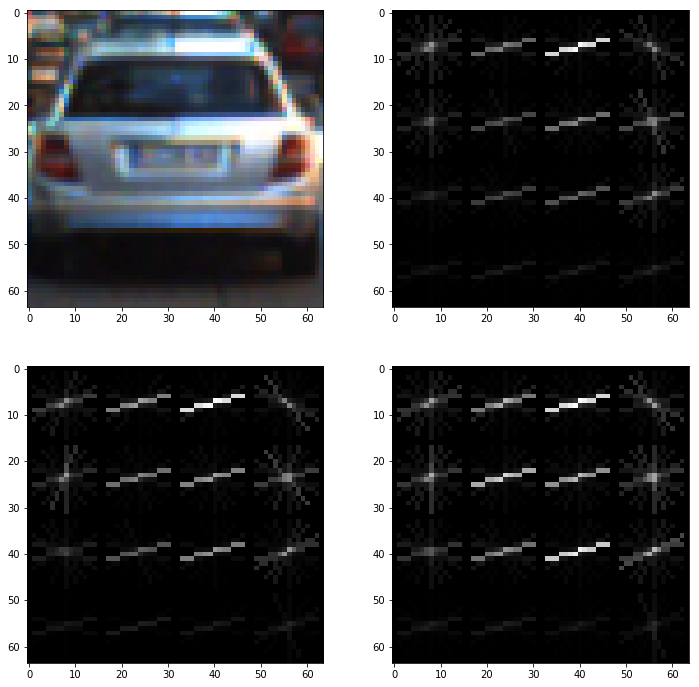

In [46]:
sample_id = np.random.randint(0, len(cars))  # Pick a random image
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)    
image = mpimg.imread(cars[sample_id])
plt.imshow(image)
channel = 0
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 2)
plt.imshow(hog_image, cmap=plt.cm.gray)
channel = 1
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 3)
plt.imshow(hog_image, cmap=plt.cm.gray)
channel = 2
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 4)
plt.imshow(hog_image, cmap=plt.cm.gray)


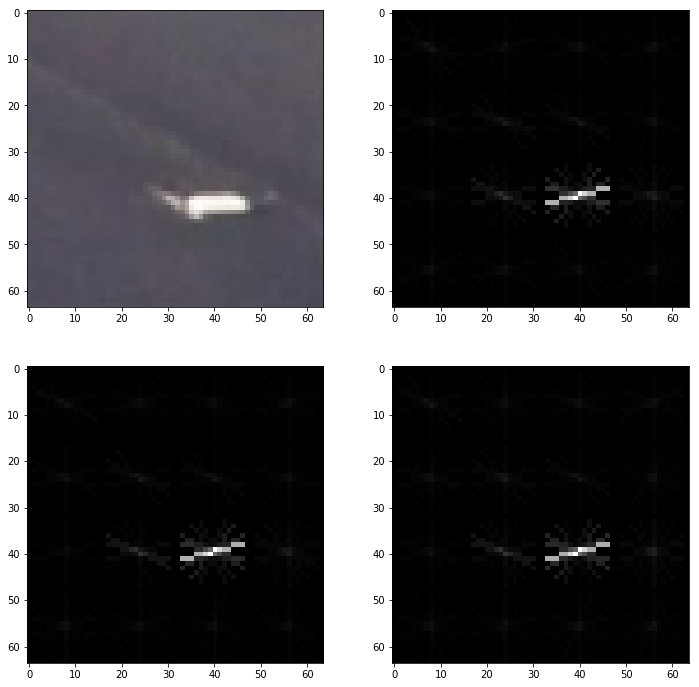

In [50]:
sample_id = np.random.randint(0, len(notcars))  # Pick a random image
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)    
image = mpimg.imread(notcars[sample_id])
plt.imshow(image)
channel = 0
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 2)
plt.imshow(hog_image, cmap=plt.cm.gray)
channel = 1
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 3)
plt.imshow(hog_image, cmap=plt.cm.gray)
channel = 2
feature_image = image[:,:,channel]
_, hog_image = hog(feature_image, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm='L2-Hys', visualise=True, feature_vector=False)
plt.subplot(2, 2, 4)
plt.imshow(hog_image, cmap=plt.cm.gray)
